# プロット改良

In [3]:
import cdflib
import pytplot
from pytplot import data_quants
import pyspedas
import xarray as xr



# ファイル名
file_path_1 = "it_h1_hf_20240323_v01.cdf"


# CDFファイルに含まれる変数の情報を取得
# variables_info = cdf_file.cdf_info()
# print(variables_info['zVariables'])
# -> ['Epoch', 'Frequency', 'RH', 'LH']


# CDFファイルを開く
cdf_file = cdflib.CDF(file_path_1)
# CDFファイルの読み込み
pytplot.cdf_to_tplot(file_path_1)

#　データの読み込み
# ここでdataは既存のxarray.DataArrayとします
# 例えば、data = xr.DataArray(...)
time = data_quants["LH"]['time']
data = data_quants["LH"]

In [ ]:
# def variables_show(file_path):
#     # ファイルのパス
#     # file_path_1 = 'hf_20220417.cdf'

#     # CDFファイルを開く
#     cdf_file = cdflib.CDF(file_path)

#     # CDFファイルに含まれる変数の情報を取得
#     variables_info = cdf_file.cdf_info()

#     z_value = variables_info.zVariables
#     print(f"zVariables: {z_value}")
#     print("\n")
    
    
#     # var_name_show = variables_info['zVariables']
#     for i in range(len(z_value)):
#         print(f"Variable: {z_value[i]}")

#         # # 変数の属性を取得
#         # var_attributes = cdf_file.varattsget(variables_info['zVariables'][i])
#         print(f"Attributes: {cdf_file.varattsget(z_value[i])}")

#         #変数のデータを取得
#         var_data_show = cdf_file.varget(z_value[i])
#         print(f"Data: {cdf_file.varget(z_value[i])}")
        
#         # 変数のタイプ
#         print(f"Type: {type(cdf_file.varget(z_value[i]))}")
        
#         # 変数の次元数
#         print(f"Dimension: {cdf_file.varget(z_value[i]).ndim}")
        
#         # 変数のサイズ
#         print(f"Shape: {cdf_file.varget(z_value[i]).shape}")
        
#         # 変数の全要素数
#         print(f"Size: {cdf_file.varget(z_value[i]).size}")
        
        
#         print("-----------")
        
        
# variables_show(file_path_1)

15 MHz = n_min = 40 (15014648)

20 MHz = n_min = 203 (19989014)

25 MHz = n_min = 367 (24993896)

30 MHz = n_max = 532 (29998780)

35 MHz = n_max = 696 (35003664)

40 MHz = n_max = 860 (40008544)

5MHz間で 163-165bin

n_min = 0 = <xarray.DataArray 'spec_bins' ()>
array(13560000., dtype=float32)
Coordinates:
    spec_bins  float32 1.356e+07
    v          float32 1.356e+07 

n_max = 900 = <xarray.DataArray 'spec_bins' ()>
array(40530000., dtype=float32)
Coordinates:
    spec_bins  float32 4.053e+07
    v          float32 4.053e+07 
 ---------------------------------- 



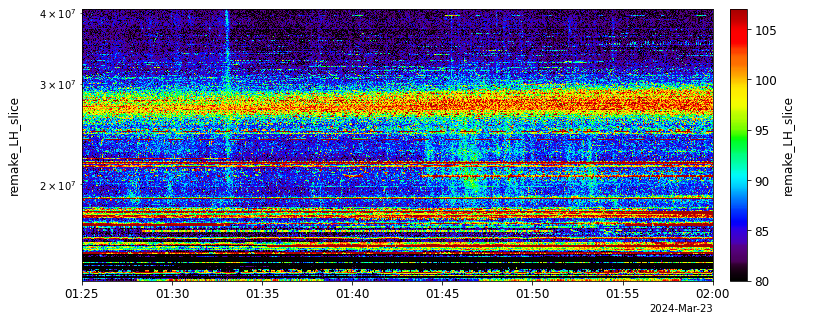

In [7]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1,'zrange':[80, 107]}) # z(強度)の分解能は1
pytplot.xlim("2024-03-23 01:25:00", "2024-03-23 02:00:00")
pytplot.tplot('remake_LH_slice')

In [ ]:
# v_dim(電波強度の次元)の長さを変更
# pytplot.option(yrange)でy軸範囲を指定できなかったので，周波数のインデックス(0-899)を取得．
n_min = int(input("n_min = "))
n_max = int(input("n_max = "))
data_index = data.sel(v_dim=slice(n_min, n_max))
v_dim_slice = data_quants["LH"]['spec_bins'].sel(v_dim=slice(n_min, n_max))

print(f'n_min = {n_min} = {min(v_dim_slice)} \n')
print(f'n_max = {n_max} = {max(v_dim_slice)} \n ---------------------------------- \n')


# plot
pytplot.store_data('remake_LH_slice', data={'x': time, 'y': data_index, 'v': v_dim_slice})
pytplot.options('remake_LH_slice', opt_dict={'ylog': 1, 'zlog': 0, 'spec':1, 'zrange':[85, 105]}) # z(強度)の分解能は1
pytplot.xlim("2022-06-13 03:25:10", "2022-06-13 03:30:00")
pytplot.tplot('remake_LH_slice')

ValueError: invalid literal for int() with base 10: ''